In [2]:
import tensorflow as tf
import efficientnet.keras as efn 
import numpy as np
import os
import keras
import cv2
import matplotlib.pyplot as plt

from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Flatten, AveragePooling2D, Input, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import SGD,Adam
from keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
from keras.applications.resnet50 import ResNet50

from livelossplot import PlotLossesKeras

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, \
classification_report, plot_confusion_matrix

from tensorflow.compat.v1.keras.backend import set_session

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5



In [3]:
labels_dict_fer = {
    "angry": 0,
    "disgust": 1,
    "fear": 2,
    "happy": 3,
    "sad": 4,
    "surprise": 5,
    "neutral": 6
}

In [4]:
path = "/home/dl/1_study/0_BSU/master_thesis/dataset/emotions/base/"

dataset_1 = "fer2013"
dataset_1_type = "crop"
dataset_1_upscale = True

dataset_2 = "jaffedbase"
dataset_2_type = "crop"
dataset_2_upscale = False

dataset_3 = "KDEF_and_AKDEF"
dataset_3_type = "crop"
dataset_3_upscale = False

In [5]:
ROWS = 128
COLS = 128
CHANNELS = 1
NUM_CLASSES = 7

# dataset

In [6]:
# fer2013 train
X_train_fer2013 = []
y_train_fer2013 = []

for emotion in os.listdir(os.path.join(path, dataset_1, "upscale", dataset_1_type, "train")):
    for img_name in os.listdir(os.path.join(path, dataset_1, "upscale", dataset_1_type, "train", emotion)):
        X_train_fer2013.append(os.path.join(path, dataset_1, "upscale", dataset_1_type, "train", emotion, img_name))
        y_train_fer2013.append(labels_dict_fer[emotion])

X_train_fer2013 = np.array(X_train_fer2013)
y_train_fer2013_one_hot = to_categorical(y_train_fer2013, num_classes=7)

print(X_train_fer2013.shape)
print(y_train_fer2013_one_hot.shape)

(27952,)
(27952, 7)


In [7]:
# fer2013 val
X_val_fer2013 = []
y_val_fer2013 = []

for folder_name in ["public_test"]:
    for emotion in os.listdir(os.path.join(path, dataset_1, "upscale", dataset_1_type, folder_name)):
        for img_name in os.listdir(os.path.join(path, dataset_1, "upscale", dataset_1_type, folder_name, emotion)):
            X_val_fer2013.append(os.path.join(path, dataset_1, "upscale", dataset_1_type, folder_name, emotion, img_name))
            y_val_fer2013.append(labels_dict_fer[emotion])

X_val_fer2013 = np.array(X_val_fer2013)
y_val_fer2013_one_hot = to_categorical(y_val_fer2013, num_classes=NUM_CLASSES)

print(X_val_fer2013.shape)
print(y_val_fer2013_one_hot.shape)

# fer2013 test
X_test_fer2013 = []
y_test_fer2013 = []
for folder_name in ["private_test"]:
    for emotion in os.listdir(os.path.join(path, dataset_1, "upscale", dataset_1_type, folder_name)):
        for img_name in os.listdir(os.path.join(path, dataset_1, "upscale", dataset_1_type, folder_name, emotion)):
            X_test_fer2013.append(os.path.join(path, dataset_1, "upscale", dataset_1_type, folder_name, emotion, img_name))
            y_test_fer2013.append(labels_dict_fer[emotion])

X_test_fer2013 = np.array(X_test_fer2013)
y_test_fer2013_one_hot = to_categorical(y_test_fer2013, num_classes=NUM_CLASSES)

print(X_test_fer2013.shape)
print(y_test_fer2013_one_hot.shape)

(3486,)
(3486, 7)
(3499,)
(3499, 7)


In [8]:
# jaffedbase
X_jaffedbase = [] 
y_jaffedbase = []

for emotion in os.listdir(os.path.join(path, dataset_2, "preprocess", dataset_2_type)):
    for img_name in os.listdir(os.path.join(path, dataset_2, "preprocess", dataset_2_type, emotion)):
        X_jaffedbase.append(os.path.join(path, dataset_2, "preprocess", dataset_2_type, emotion, img_name))
        y_jaffedbase.append(labels_dict_fer[emotion])
        
X_jaffedbase = np.array(X_jaffedbase)
y_jaffedbase_one_hot = to_categorical(y_jaffedbase, num_classes=NUM_CLASSES)

X_train_jaffedbase, X_test_jaffedbase, y_train_jaffedbase, y_test_jaffedbase = \
train_test_split(X_jaffedbase, y_jaffedbase_one_hot, test_size=0.2, random_state=42, stratify=y_jaffedbase)

print(X_train_jaffedbase.shape)
print(y_train_jaffedbase.shape)
print(X_test_jaffedbase.shape)
print(y_test_jaffedbase.shape)

(78,)
(78, 7)
(20,)
(20, 7)


In [9]:
# KDEF_and_AKDEF
X_kdef = [] 
y_kdef = []

for emotion in os.listdir(os.path.join(path, dataset_3, "preprocess", dataset_3_type)):
    for img_name in os.listdir(os.path.join(path, dataset_3, "preprocess", dataset_3_type, emotion)):
        X_kdef.append(os.path.join(path, dataset_3, "preprocess", dataset_3_type, emotion, img_name))
        y_kdef.append(labels_dict_fer[emotion])

X_kdef = np.array(X_kdef)
y_kdef_one_hot = to_categorical(y_kdef, num_classes=NUM_CLASSES)

X_train_kdef, X_test_kdef, y_train_kdef, y_test_kdef = \
train_test_split(X_kdef, y_kdef_one_hot, test_size=0.2, random_state=42, stratify=y_kdef)

print(X_train_kdef.shape)
print(y_train_kdef.shape)
print(X_test_kdef.shape)
print(y_test_kdef.shape)

(3912,)
(3912, 7)
(978,)
(978, 7)


In [10]:
X_train, y_train = np.concatenate([X_train_fer2013, X_train_jaffedbase, X_train_kdef]), \
np.concatenate([y_train_fer2013_one_hot, y_train_jaffedbase, y_train_kdef])
X_val, y_val = X_val_fer2013, y_val_fer2013_one_hot
X_test, y_test_one_hot = np.concatenate([X_test_fer2013, X_test_jaffedbase, X_test_kdef]), \
np.concatenate([y_test_fer2013_one_hot, y_test_jaffedbase, y_test_kdef])

In [11]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(31942,)
(3486,)
(4497,)


# augmentation

In [11]:
# from albumentations import Compose, HorizontalFlip, HueSaturationValue,\
#                             Blur, ShiftScaleRotate, RandomBrightness, \
#                             Rotate,IAACropAndPad, CenterCrop, Lambda, \
#                             Downscale, Crop
# import albumentations as A

In [12]:
# aug = Compose([
#         HorizontalFlip(p=0.7),
#         Blur(blur_limit=3, p=0.6),
#         RandomBrightness(limit=0.01, p=0.6),
#         Rotate(limit=10,border_mode=cv2.BORDER_CONSTANT, value=(255, 255, 255), p=0.4),
#         HueSaturationValue(hue_shift_limit=1,
#                            sat_shift_limit=1,
#                            val_shift_limit=1,
#                            p=0.6)], p=1)

# generator

In [13]:
class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_names, labels, batch_size=32, dim=(32,32), n_channels=1,
                 n_classes=10, shuffle=True, with_aug=False):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.list_names = list_names
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.with_aug = with_aug
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_names) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of images
        list_names_temp = [self.list_names[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_names_temp, indexes)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_names))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)
            
    def preprocess(self, img):
        img = cv2.resize(img, self.dim)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY).astype(np.float32)
        
#         mean = [103.939, 116.778, 123.68] # bgr
    
#         mean = [123.68, 116.778, 103.939] # rgb
#         _IMAGENET_MEAN = -np.array(mean, dtype=np.float32)
#         img += _IMAGENET_MEAN
        img /= 255.

        return img

    def __data_generation(self, list_names_temp, indexes):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels), dtype=np.float32)
        y = np.empty((self.batch_size, self.n_classes), dtype=int)

        # Generate data
        for i, name, index in zip(range(self.batch_size), list_names_temp, indexes):
            image = cv2.imread(name)
            # Store sample
            if self.with_aug:
                augmented = aug(image=image) 
                aug_image = np.expand_dims(augmented['image'], -1)
                image_preproc = self.preprocess(aug_image)
                
                X[i,] = aug_image
            else:
                image_preproc = self.preprocess(image)
                X[i,] = np.expand_dims(image_preproc, -1)
                
            # Store class
            y[i] = self.labels[index]

        return X, y

# models, train

In [14]:
names_train = X_train
labels_train = y_train

names_val = X_val
labels_val = y_val

# Generators
training_generator = DataGenerator(names_train, labels_train, dim=(COLS, ROWS), batch_size=16, 
                                   n_classes=NUM_CLASSES, n_channels=1, shuffle=True, with_aug=False)
validation_generator = DataGenerator(names_val, labels_val, dim=(COLS, ROWS), batch_size=16, 
                                     n_classes=NUM_CLASSES, n_channels=1, shuffle=True, with_aug=False)

In [5]:
# # resnet50
# base_model_resnet = ResNet50(weights=None, include_top=False, input_shape=(COLS, ROWS, 1))

# x = base_model_resnet.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(128,activation='relu')(x)
# x = Dropout(0.2)(x)
# preds = Dense(NUM_CLASSES, activation='softmax')(x)

# model=Model(inputs=base_model_resnet.input, outputs=preds)
# model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   3200        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [6]:
# EfficientNet
base_model_efficient = efn.EfficientNetB0(weights=None, include_top=False, 
                                                           input_shape= (COLS, ROWS, 1))

x = base_model_efficient.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
# x = Dropout(0.2)(x)
preds = Dense(NUM_CLASSES, activation='softmax')(x)

model=Model(inputs=base_model_efficient.input, outputs=preds)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 64, 64, 32)   288         input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 64, 64, 32)   128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 64, 64, 32)   0           stem_bn[0][0]                    
_______________________________________________________________________________________

In [7]:
adam = Adam(decay=1e-6)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.5
    epochs_drop = 20
    lrate = initial_lrate * np.power(drop,  
           np.floor((1+epoch)/epochs_drop))
    return lrate

save_dir = '/storage/dl/emotions/weights/KerasEffNetB0Gray_128x128_batch_16_ALL_crop_FREP_upscale/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
lrate = LearningRateScheduler(step_decay)
checkpoints = ModelCheckpoint(filepath=os.path.join(save_dir, 'weights.{epoch:02d}-{val_loss:.2f}.h5'),
                              verbose=2,period=10) #save_best_only=True,
callbacks_list = [checkpoints, lrate, PlotLossesKeras()]

In [19]:
EPOCHS = 100
model.fit_generator(generator=training_generator,
                    validation_data=validation_generator,
                    epochs=EPOCHS,
#                     use_multiprocessing=True,
                    callbacks=callbacks_list,
                    verbose=1,
                    workers=6)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
 164/1996 [=>............................] - ETA: 1:43 - loss: 1.9049 - accuracy: 0.2222

KeyboardInterrupt: 

In [9]:
model.load_weights("/home/dl/1_study/0_BSU/master_thesis/weights/emotion/KerasEffNetB0Gray_128x128_batch_16_withoutDP_ALL_aug_crop_FER_upscale_/weights.12-1.07.h5")

In [10]:
model.save("/home/dl/1_study/0_BSU/master_thesis/weights/emotion/KerasEffNetB0Gray_128x128_batch_16_withoutDP_ALL_aug_crop_FER_upscale_/")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /home/dl/1_study/0_BSU/master_thesis/weights/emotion/KerasEffNetB0Gray_128x128_batch_16_withoutDP_ALL_aug_crop_FER_upscale_/assets


# Test

In [15]:
y_test = np.argmax(y_test_one_hot, axis=1)

In [13]:
def do_metrics_report(dataset_name, y_pred, y_test):
    print(dataset_name)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('F1:', f1_score(y_test, y_pred, average='weighted'))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

common
Accuracy: 0.6362019123860352
F1: 0.6288191042143657
[[405  14  33  29  70  15  51]
 [ 35 141   2   2  10   2   2]
 [106  12 214  37 132  93  56]
 [ 39   2  22 882  17  15  33]
 [123  18  43  43 330  16 145]
 [ 15   2  55  31   6 432   9]
 [ 76   4  30  49 133   9 457]]
              precision    recall  f1-score   support

           0       0.51      0.66      0.57       617
           1       0.73      0.73      0.73       194
           2       0.54      0.33      0.41       650
           3       0.82      0.87      0.85      1010
           4       0.47      0.46      0.47       718
           5       0.74      0.79      0.76       550
           6       0.61      0.60      0.60       758

    accuracy                           0.64      4497
   macro avg       0.63      0.63      0.63      4497
weighted avg       0.63      0.64      0.63      4497

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'sad': 4, 'surprise': 5, 'neutral': 6}
fer2013
Accuracy: 0.579879965704487
F

<AxesSubplot:>

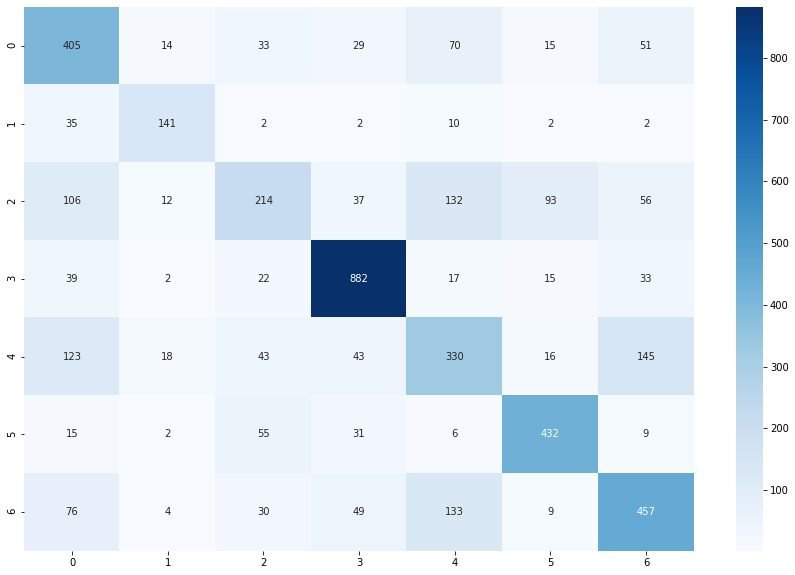

In [33]:
# EfficientNetB0
model_dir = "/home/dl/1_study/0_BSU/master_thesis/weights/emotion/KerasEffNetB0Gray_128x128_batch_16_ALL_crop_FREP_upscale/"
model = keras.models.load_model(model_dir)

X_pred = np.array([cv2.cvtColor(cv2.resize(cv2.imread(name), (COLS, ROWS)), cv2.COLOR_RGB2GRAY).astype(np.float32)/255 
                   for name in X_test])
y_pred = np.argmax(model.predict(X_pred), axis=1)
do_metrics_report("common", y_pred, y_test)
print(labels_dict_fer)

X_pred_fer2013 = np.array([cv2.cvtColor(cv2.resize(cv2.imread(name), (COLS, ROWS)), cv2.COLOR_RGB2GRAY).astype(np.float32)/255 
                   for name in X_test_fer2013])
y_pred_fer2013 = np.argmax(model.predict(X_pred_fer2013), axis=1)
do_metrics_report("fer2013", y_pred_fer2013, y_test_fer2013)
print(labels_dict_fer)

X_pred_jaffedbase = np.array([cv2.cvtColor(cv2.resize(cv2.imread(name), (COLS, ROWS)), cv2.COLOR_RGB2GRAY).astype(np.float32)/255 
                   for name in X_test_jaffedbase])
y_pred_jaffedbase = np.argmax(model.predict(X_pred_jaffedbase), axis=1)
do_metrics_report("jaffedbase", y_pred_jaffedbase, np.argmax(y_test_jaffedbase, axis=1))
print(labels_dict_fer)

X_pred_kdef = np.array([cv2.cvtColor(cv2.resize(cv2.imread(name), (COLS, ROWS)), cv2.COLOR_RGB2GRAY).astype(np.float32)/255 
                   for name in X_test_kdef])
y_pred_kdef = np.argmax(model.predict(X_pred_kdef), axis=1)
do_metrics_report("kdef", y_pred_kdef, np.argmax(y_test_kdef, axis=1))
print(labels_dict_fer)

plt.figure(figsize=(15, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.3g', cmap="Blues")

In [27]:
# Resnet50
model_dir = "/home/dl/1_study/0_BSU/master_thesis/weights/emotion/KerasResnet50Gray_128x128_batch_16_ALL_crop_FREP_upscale/"
model = keras.models.load_model(model_dir)

X_pred = np.array([cv2.cvtColor(cv2.resize(cv2.imread(name), (COLS, ROWS)), cv2.COLOR_RGB2GRAY).astype(np.float32)/255 
                   for name in X_test])

y_pred = np.argmax(model.predict(X_pred), axis=1)
do_metrics_report("common", y_pred, y_test)
print(labels_dict_fer)

X_pred_fer2013 = np.array([cv2.cvtColor(cv2.resize(cv2.imread(name), (COLS, ROWS)), cv2.COLOR_RGB2GRAY).astype(np.float32)/255 
                   for name in X_test_fer2013])
y_pred_fer2013 = np.argmax(model.predict(X_pred_fer2013), axis=1)
do_metrics_report("fer2013", y_pred_fer2013, y_test_fer2013)
print(labels_dict_fer)

X_pred_jaffedbase = np.array([cv2.cvtColor(cv2.resize(cv2.imread(name), (COLS, ROWS)), cv2.COLOR_RGB2GRAY).astype(np.float32)/255 
                   for name in X_test_jaffedbase])
y_pred_jaffedbase = np.argmax(model.predict(X_pred_jaffedbase), axis=1)
do_metrics_report("jaffedbase", y_pred_jaffedbase, np.argmax(y_test_jaffedbase, axis=1))
print(labels_dict_fer)

X_pred_kdef = np.array([cv2.cvtColor(cv2.resize(cv2.imread(name), (COLS, ROWS)), cv2.COLOR_RGB2GRAY).astype(np.float32)/255 
                   for name in X_test_kdef])
y_pred_kdef = np.argmax(model.predict(X_pred_kdef), axis=1)
do_metrics_report("kdef", y_pred_kdef, np.argmax(y_test_kdef, axis=1))
print(labels_dict_fer)

common
Accuracy: 0.5561485434734267
F1: 0.5472924325898014
[[238  43  60  40 147  13  76]
 [ 57 100   5   5  24   1   2]
 [ 91   1 170  45 120 106 117]
 [ 15   0  20 884  47   6  38]
 [ 85   8  38  65 261   5 256]
 [ 12   0  78  19  23 397  21]
 [ 26   0  37  79 161   4 451]]
              precision    recall  f1-score   support

           0       0.45      0.39      0.42       617
           1       0.66      0.52      0.58       194
           2       0.42      0.26      0.32       650
           3       0.78      0.88      0.82      1010
           4       0.33      0.36      0.35       718
           5       0.75      0.72      0.73       550
           6       0.47      0.59      0.52       758

    accuracy                           0.56      4497
   macro avg       0.55      0.53      0.54      4497
weighted avg       0.55      0.56      0.55      4497

fer2013
Accuracy: 0.5298656759074021
F1: 0.5183722756068034
[[168   1  57  38 130  13  67]
 [ 28   0   5   4  13   1   2]
 [ 6

/home/dl/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


kdef
Accuracy: 0.6503067484662577
F1: 0.6332110112921332
[[ 69  42   3   2  17   0   7]
 [ 28 100   0   1  10   0   0]
 [ 22   1  45   7  10  40  15]
 [  1   0   0 138   0   0   1]
 [ 18   8   5   1  46   1  61]
 [  0   0   8   0   0 131   1]
 [  2   0   3   0  27   0 107]]
              precision    recall  f1-score   support

           0       0.49      0.49      0.49       140
           1       0.66      0.72      0.69       139
           2       0.70      0.32      0.44       140
           3       0.93      0.99      0.96       140
           4       0.42      0.33      0.37       140
           5       0.76      0.94      0.84       140
           6       0.56      0.77      0.65       139

    accuracy                           0.65       978
   macro avg       0.65      0.65      0.63       978
weighted avg       0.65      0.65      0.63       978



In [16]:
# EfficientNetB0 aug
model_dir = "/home/dl/1_study/0_BSU/master_thesis/weights/emotion/KerasEffNetB0Gray_128x128_batch_16_withoutDP_ALL_aug_crop_FREP_upscale/"
model = keras.models.load_model(model_dir)

X_pred = np.array([cv2.cvtColor(cv2.resize(cv2.imread(name), (COLS, ROWS)), cv2.COLOR_RGB2GRAY).astype(np.float32)/255 
                   for name in X_test])
y_pred = np.argmax(model.predict(X_pred), axis=1)
do_metrics_report("common", y_pred, y_test)
print(labels_dict_fer)

X_pred_fer2013 = np.array([cv2.cvtColor(cv2.resize(cv2.imread(name), (COLS, ROWS)), cv2.COLOR_RGB2GRAY).astype(np.float32)/255 
                   for name in X_test_fer2013])
y_pred_fer2013 = np.argmax(model.predict(X_pred_fer2013), axis=1)
do_metrics_report("fer2013", y_pred_fer2013, y_test_fer2013)
print(labels_dict_fer)

X_pred_jaffedbase = np.array([cv2.cvtColor(cv2.resize(cv2.imread(name), (COLS, ROWS)), cv2.COLOR_RGB2GRAY).astype(np.float32)/255 
                   for name in X_test_jaffedbase])
y_pred_jaffedbase = np.argmax(model.predict(X_pred_jaffedbase), axis=1)
do_metrics_report("jaffedbase", y_pred_jaffedbase, np.argmax(y_test_jaffedbase, axis=1))
print(labels_dict_fer)

X_pred_kdef = np.array([cv2.cvtColor(cv2.resize(cv2.imread(name), (COLS, ROWS)), cv2.COLOR_RGB2GRAY).astype(np.float32)/255 
                   for name in X_test_kdef])
y_pred_kdef = np.argmax(model.predict(X_pred_kdef), axis=1)
do_metrics_report("kdef", y_pred_kdef, np.argmax(y_test_kdef, axis=1))
print(labels_dict_fer)

common
Accuracy: 0.6766733377807427
F1: 0.6699847571082534
[[367  11  46  27  71  17  78]
 [ 25 143   7   2  11   4   2]
 [ 70   4 239  41 133  89  74]
 [ 16   0  12 908  19  16  39]
 [ 54   3  66  37 390  10 158]
 [  8   0  62  31   0 432  17]
 [ 22   0  27  35  96  14 564]]
              precision    recall  f1-score   support

           0       0.65      0.59      0.62       617
           1       0.89      0.74      0.81       194
           2       0.52      0.37      0.43       650
           3       0.84      0.90      0.87      1010
           4       0.54      0.54      0.54       718
           5       0.74      0.79      0.76       550
           6       0.61      0.74      0.67       758

    accuracy                           0.68      4497
   macro avg       0.68      0.67      0.67      4497
weighted avg       0.67      0.68      0.67      4497

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'sad': 4, 'surprise': 5, 'neutral': 6}
fer2013
Accuracy: 0.6210345813089454


common
Accuracy: 0.6499888814765399
F1: 0.6475908231452407
[[368  26  28  18 108   9  60]
 [ 34 142   1   1  12   2   2]
 [ 96  12 207  12 178  82  63]
 [ 34   6  15 840  54  18  43]
 [ 53  18  38  24 475   6 104]
 [ 19   1  50  24   9 425  22]
 [ 45   0  13  26 198  10 466]]
              precision    recall  f1-score   support

           0       0.57      0.60      0.58       617
           1       0.69      0.73      0.71       194
           2       0.59      0.32      0.41       650
           3       0.89      0.83      0.86      1010
           4       0.46      0.66      0.54       718
           5       0.77      0.77      0.77       550
           6       0.61      0.61      0.61       758

    accuracy                           0.65      4497
   macro avg       0.65      0.65      0.64      4497
weighted avg       0.66      0.65      0.65      4497

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'sad': 4, 'surprise': 5, 'neutral': 6}
fer2013
Accuracy: 0.6118891111746213


/home/dl/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


kdef
Accuracy: 0.7914110429447853
F1: 0.7884360338679876
[[100  25   4   0   6   0   5]
 [  2 133   0   0   4   0   0]
 [ 10  11  74   0  13  26   6]
 [  0   6   6 126   1   0   1]
 [  0  16   3   0 118   0   3]
 [  0   0   6   0   1 129   4]
 [  4   0   0   0  41   0  94]]
              precision    recall  f1-score   support

           0       0.86      0.71      0.78       140
           1       0.70      0.96      0.81       139
           2       0.80      0.53      0.64       140
           3       1.00      0.90      0.95       140
           4       0.64      0.84      0.73       140
           5       0.83      0.92      0.87       140
           6       0.83      0.68      0.75       139

    accuracy                           0.79       978
   macro avg       0.81      0.79      0.79       978
weighted avg       0.81      0.79      0.79       978

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'sad': 4, 'surprise': 5, 'neutral': 6}


<AxesSubplot:>

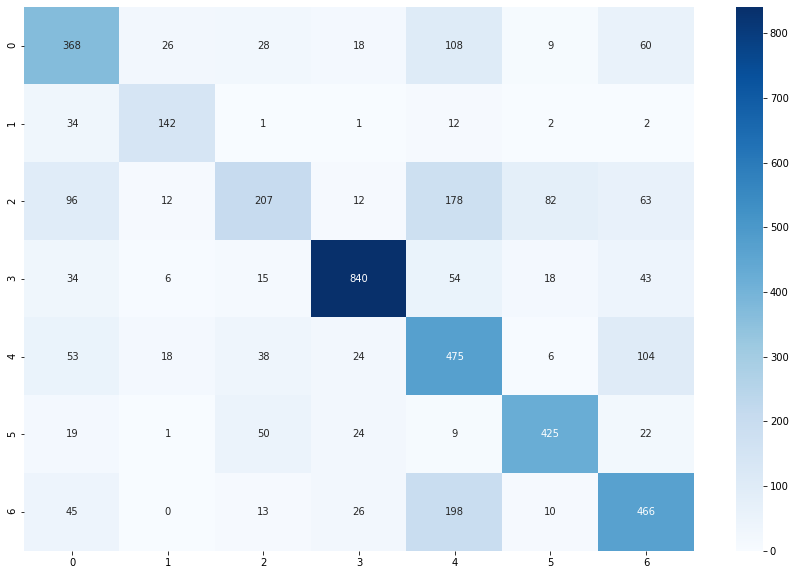

In [34]:
# EfficientNetB0 aug crop
model_dir = "/home/dl/1_study/0_BSU/master_thesis/weights/emotion/KerasEffNetB0Gray_128x128_batch_16_withoutDP_ALL_aug_crop_FER_upscale/"
model = keras.models.load_model(model_dir)

X_pred = np.array([cv2.cvtColor(cv2.resize(cv2.imread(name), (COLS, ROWS)), cv2.COLOR_RGB2GRAY).astype(np.float32)/255 
                   for name in X_test])
y_pred = np.argmax(model.predict(X_pred), axis=1)
do_metrics_report("common", y_pred, y_test)
print(labels_dict_fer)

X_pred_fer2013 = np.array([cv2.cvtColor(cv2.resize(cv2.imread(name), (COLS, ROWS)), cv2.COLOR_RGB2GRAY).astype(np.float32)/255 
                   for name in X_test_fer2013])
y_pred_fer2013 = np.argmax(model.predict(X_pred_fer2013), axis=1)
do_metrics_report("fer2013", y_pred_fer2013, y_test_fer2013)
print(labels_dict_fer)

X_pred_jaffedbase = np.array([cv2.cvtColor(cv2.resize(cv2.imread(name), (COLS, ROWS)), cv2.COLOR_RGB2GRAY).astype(np.float32)/255 
                   for name in X_test_jaffedbase])
y_pred_jaffedbase = np.argmax(model.predict(X_pred_jaffedbase), axis=1)
do_metrics_report("jaffedbase", y_pred_jaffedbase, np.argmax(y_test_jaffedbase, axis=1))
print(labels_dict_fer)

X_pred_kdef = np.array([cv2.cvtColor(cv2.resize(cv2.imread(name), (COLS, ROWS)), cv2.COLOR_RGB2GRAY).astype(np.float32)/255 
                   for name in X_test_kdef])
y_pred_kdef = np.argmax(model.predict(X_pred_kdef), axis=1)
do_metrics_report("kdef", y_pred_kdef, np.argmax(y_test_kdef, axis=1))
print(labels_dict_fer)

plt.figure(figsize=(15, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.3g', cmap="Blues")

common
Accuracy: 0.33755837224816543
F1: 0.3372504334349929
[[251   1 160  15  63  58  69]
 [118  19  26   3  12   6  10]
 [126   3 229  23  71 105  93]
 [200   4 209 261  66 127 143]
 [115   4 207  48 165  53 126]
 [ 52   0 140  24   5 297  32]
 [105   1 157  45  85  69 296]]
              precision    recall  f1-score   support

           0       0.26      0.41      0.32       617
           1       0.59      0.10      0.17       194
           2       0.20      0.35      0.26       650
           3       0.62      0.26      0.37      1010
           4       0.35      0.23      0.28       718
           5       0.42      0.54      0.47       550
           6       0.38      0.39      0.39       758

    accuracy                           0.34      4497
   macro avg       0.40      0.33      0.32      4497
weighted avg       0.40      0.34      0.34      4497

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'sad': 4, 'surprise': 5, 'neutral': 6}
fer2013
Accuracy: 0.3495284366961989

<AxesSubplot:>

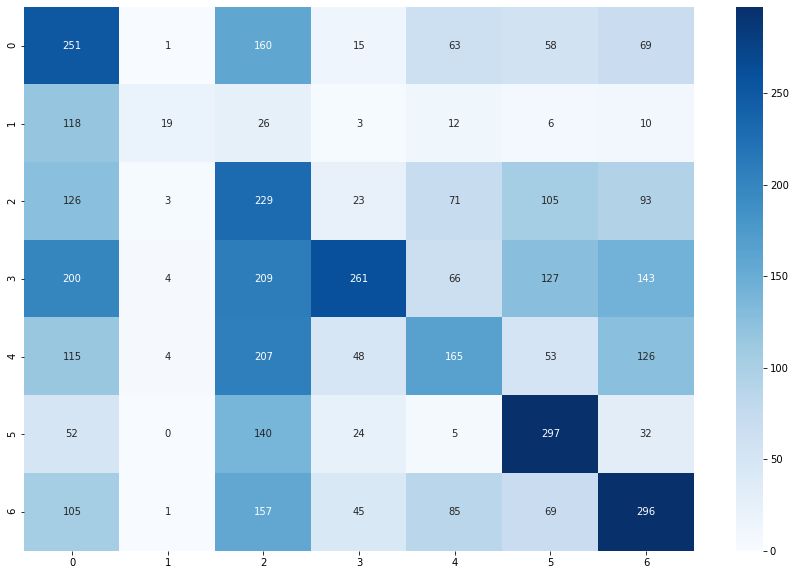

In [35]:
# EfficientNetB0 aug dewarp
model_dir = "/home/dl/1_study/0_BSU/master_thesis/weights/emotion/KerasEffNetB0Gray_128x128_batch_16_withoutDP_ALL_aug_dewarp_FER_upscale/"
model = keras.models.load_model(model_dir)

X_pred = np.array([cv2.cvtColor(cv2.resize(cv2.imread(name), (COLS, ROWS)), cv2.COLOR_RGB2GRAY).astype(np.float32)/255 
                   for name in X_test])
y_pred = np.argmax(model.predict(X_pred), axis=1)
do_metrics_report("common", y_pred, y_test)
print(labels_dict_fer)

X_pred_fer2013 = np.array([cv2.cvtColor(cv2.resize(cv2.imread(name), (COLS, ROWS)), cv2.COLOR_RGB2GRAY).astype(np.float32)/255 
                   for name in X_test_fer2013])
y_pred_fer2013 = np.argmax(model.predict(X_pred_fer2013), axis=1)
do_metrics_report("fer2013", y_pred_fer2013, y_test_fer2013)
print(labels_dict_fer)

X_pred_jaffedbase = np.array([cv2.cvtColor(cv2.resize(cv2.imread(name), (COLS, ROWS)), cv2.COLOR_RGB2GRAY).astype(np.float32)/255 
                   for name in X_test_jaffedbase])
y_pred_jaffedbase = np.argmax(model.predict(X_pred_jaffedbase), axis=1)
do_metrics_report("jaffedbase", y_pred_jaffedbase, np.argmax(y_test_jaffedbase, axis=1))
print(labels_dict_fer)

X_pred_kdef = np.array([cv2.cvtColor(cv2.resize(cv2.imread(name), (COLS, ROWS)), cv2.COLOR_RGB2GRAY).astype(np.float32)/255 
                   for name in X_test_kdef])
y_pred_kdef = np.argmax(model.predict(X_pred_kdef), axis=1)
do_metrics_report("kdef", y_pred_kdef, np.argmax(y_test_kdef, axis=1))
print(labels_dict_fer)

plt.figure(figsize=(15, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.3g', cmap="Blues")

common
Accuracy: 0.6177451634422949
F1: 0.6014907689645212
[[315   0  95  33 122   6  46]
 [171   0   4   5  11   2   1]
 [ 97   0 260  32 110  93  58]
 [ 20   0  11 908  18  26  27]
 [ 68   0  69  45 389   8 139]
 [ 12   0  61  26   5 432  14]
 [ 23   0  42  64 147   8 474]]
              precision    recall  f1-score   support

           0       0.45      0.51      0.48       617
           1       0.00      0.00      0.00       194
           2       0.48      0.40      0.44       650
           3       0.82      0.90      0.86      1010
           4       0.49      0.54      0.51       718
           5       0.75      0.79      0.77       550
           6       0.62      0.63      0.62       758

    accuracy                           0.62      4497
   macro avg       0.51      0.54      0.52      4497
weighted avg       0.59      0.62      0.60      4497

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'sad': 4, 'surprise': 5, 'neutral': 6}
fer2013
Accuracy: 0.5955987424978565


<AxesSubplot:>

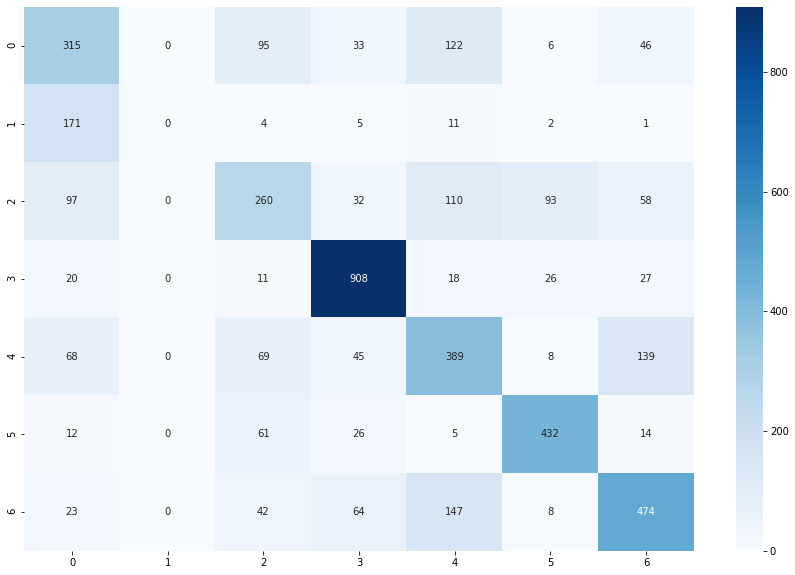

In [36]:
# Resnet50 aug crop
model_dir = "/home/dl/1_study/0_BSU/master_thesis/weights/emotion/KerasResnet50Gray_128x128_batch_16_withoutDP_ALL_aug_crop_FER_upscale/"
model = keras.models.load_model(model_dir)

X_pred = np.array([cv2.cvtColor(cv2.resize(cv2.imread(name), (COLS, ROWS)), cv2.COLOR_RGB2GRAY).astype(np.float32)/255 
                   for name in X_test])
y_pred = np.argmax(model.predict(X_pred), axis=1)
do_metrics_report("common", y_pred, y_test)
print(labels_dict_fer)

X_pred_fer2013 = np.array([cv2.cvtColor(cv2.resize(cv2.imread(name), (COLS, ROWS)), cv2.COLOR_RGB2GRAY).astype(np.float32)/255 
                   for name in X_test_fer2013])
y_pred_fer2013 = np.argmax(model.predict(X_pred_fer2013), axis=1)
do_metrics_report("fer2013", y_pred_fer2013, y_test_fer2013)
print(labels_dict_fer)

X_pred_jaffedbase = np.array([cv2.cvtColor(cv2.resize(cv2.imread(name), (COLS, ROWS)), cv2.COLOR_RGB2GRAY).astype(np.float32)/255 
                   for name in X_test_jaffedbase])
y_pred_jaffedbase = np.argmax(model.predict(X_pred_jaffedbase), axis=1)
do_metrics_report("jaffedbase", y_pred_jaffedbase, np.argmax(y_test_jaffedbase, axis=1))
print(labels_dict_fer)

X_pred_kdef = np.array([cv2.cvtColor(cv2.resize(cv2.imread(name), (COLS, ROWS)), cv2.COLOR_RGB2GRAY).astype(np.float32)/255 
                   for name in X_test_kdef])
y_pred_kdef = np.argmax(model.predict(X_pred_kdef), axis=1)
do_metrics_report("kdef", y_pred_kdef, np.argmax(y_test_kdef, axis=1))
print(labels_dict_fer)

plt.figure(figsize=(15, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.3g', cmap="Blues")

common
Accuracy: 0.32888592394929955
F1: 0.3331722359718658
[[177   2 241  18  58  68  53]
 [ 73  31  53   1  15   8  13]
 [ 82   0 301  14  48 142  63]
 [ 41   0 367 292  43  99 168]
 [114   2 303  24 104  53 118]
 [ 13   0 161   7   8 345  16]
 [ 50   0 322  33  80  44 229]]
              precision    recall  f1-score   support

           0       0.32      0.29      0.30       617
           1       0.89      0.16      0.27       194
           2       0.17      0.46      0.25       650
           3       0.75      0.29      0.42      1010
           4       0.29      0.14      0.19       718
           5       0.45      0.63      0.53       550
           6       0.35      0.30      0.32       758

    accuracy                           0.33      4497
   macro avg       0.46      0.32      0.33      4497
weighted avg       0.44      0.33      0.33      4497

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'sad': 4, 'surprise': 5, 'neutral': 6}
fer2013
Accuracy: 0.3343812517862246

<AxesSubplot:>

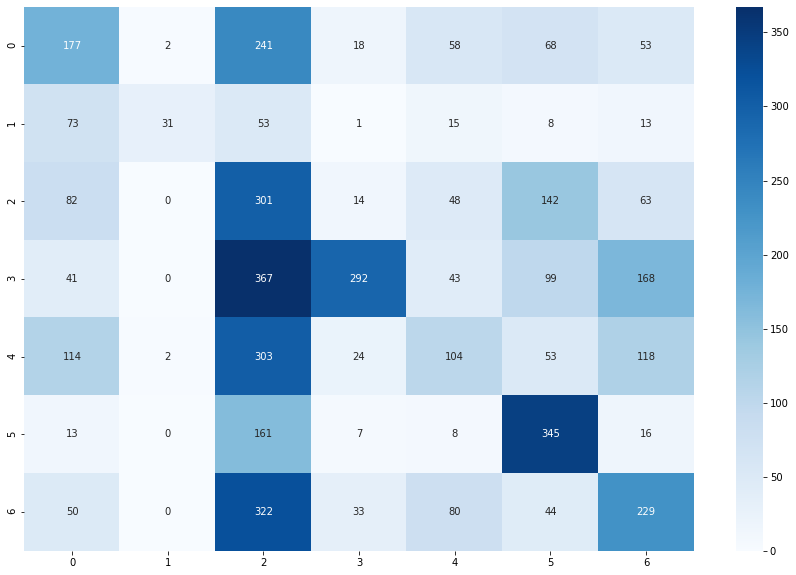

In [37]:
# Resnet50 aug dewarp
model_dir = "/home/dl/1_study/0_BSU/master_thesis/weights/emotion/KerasResnet50Gray_128x128_batch_16_withoutDP_ALL_aug_dewarp_FER_upscale/"
model = keras.models.load_model(model_dir)

X_pred = np.array([cv2.cvtColor(cv2.resize(cv2.imread(name), (COLS, ROWS)), cv2.COLOR_RGB2GRAY).astype(np.float32)/255 
                   for name in X_test])
y_pred = np.argmax(model.predict(X_pred), axis=1)
do_metrics_report("common", y_pred, y_test)
print(labels_dict_fer)

X_pred_fer2013 = np.array([cv2.cvtColor(cv2.resize(cv2.imread(name), (COLS, ROWS)), cv2.COLOR_RGB2GRAY).astype(np.float32)/255 
                   for name in X_test_fer2013])
y_pred_fer2013 = np.argmax(model.predict(X_pred_fer2013), axis=1)
do_metrics_report("fer2013", y_pred_fer2013, y_test_fer2013)
print(labels_dict_fer)

X_pred_jaffedbase = np.array([cv2.cvtColor(cv2.resize(cv2.imread(name), (COLS, ROWS)), cv2.COLOR_RGB2GRAY).astype(np.float32)/255 
                   for name in X_test_jaffedbase])
y_pred_jaffedbase = np.argmax(model.predict(X_pred_jaffedbase), axis=1)
do_metrics_report("jaffedbase", y_pred_jaffedbase, np.argmax(y_test_jaffedbase, axis=1))
print(labels_dict_fer)

X_pred_kdef = np.array([cv2.cvtColor(cv2.resize(cv2.imread(name), (COLS, ROWS)), cv2.COLOR_RGB2GRAY).astype(np.float32)/255 
                   for name in X_test_kdef])
y_pred_kdef = np.argmax(model.predict(X_pred_kdef), axis=1)
do_metrics_report("kdef", y_pred_kdef, np.argmax(y_test_kdef, axis=1))
print(labels_dict_fer)

plt.figure(figsize=(15, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.3g', cmap="Blues")

In [19]:
# plot_confusion_matrix(model, X_pred, y_test, cmap=plt.cm.Blues, normalize='true', xticks_rotation='vertical')
# plt.title(name)
# plt.savefig(os.path.join(path, 'conf_matr', name+'.png'))
# plt.show()

common
Accuracy: 0.6604402935290193
F1: 0.6514829551767409
[[405   6  34  29  68  18  57]
 [ 47 116   4   2  21   3   1]
 [ 92   7 200  27 151  93  80]
 [ 20   0  13 910  20   9  38]
 [ 82   4  31  41 390  12 158]
 [ 14   0  50  39   7 417  23]
 [ 58   0  10  43 106   9 532]]
              precision    recall  f1-score   support

           0       0.56      0.66      0.61       617
           1       0.87      0.60      0.71       194
           2       0.58      0.31      0.40       650
           3       0.83      0.90      0.87      1010
           4       0.51      0.54      0.53       718
           5       0.74      0.76      0.75       550
           6       0.60      0.70      0.65       758

    accuracy                           0.66      4497
   macro avg       0.67      0.64      0.64      4497
weighted avg       0.66      0.66      0.65      4497

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'sad': 4, 'surprise': 5, 'neutral': 6}
fer2013
Accuracy: 0.6153186624749929


<AxesSubplot:>

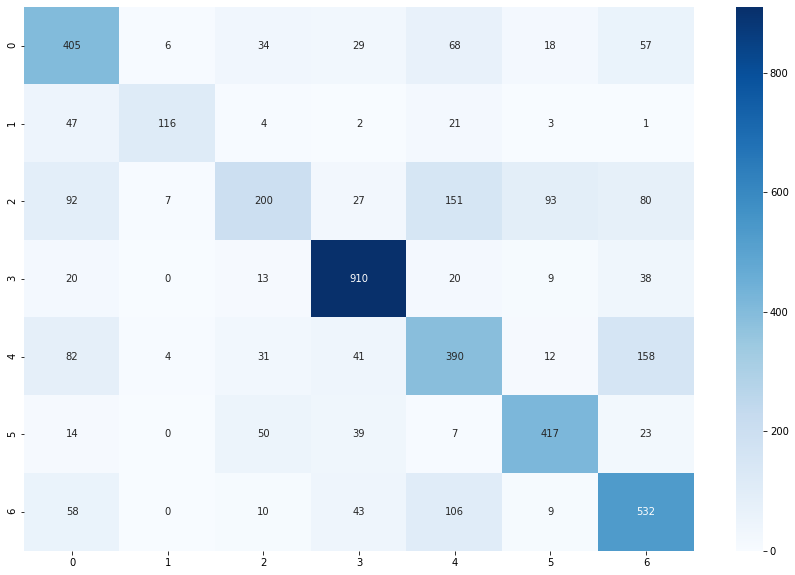

In [38]:
# EfficientNetB0 aug crop _
model_dir = "/home/dl/1_study/0_BSU/master_thesis/weights/emotion/KerasEffNetB0Gray_128x128_batch_16_withoutDP_ALL_aug_crop_FER_upscale_/"
model = keras.models.load_model(model_dir)

X_pred = np.array([cv2.cvtColor(cv2.resize(cv2.imread(name), (COLS, ROWS)), cv2.COLOR_RGB2GRAY).astype(np.float32)/255 
                   for name in X_test])
y_pred = np.argmax(model.predict(X_pred), axis=1)
do_metrics_report("common", y_pred, y_test)
print(labels_dict_fer)

X_pred_fer2013 = np.array([cv2.cvtColor(cv2.resize(cv2.imread(name), (COLS, ROWS)), cv2.COLOR_RGB2GRAY).astype(np.float32)/255 
                   for name in X_test_fer2013])
y_pred_fer2013 = np.argmax(model.predict(X_pred_fer2013), axis=1)
do_metrics_report("fer2013", y_pred_fer2013, y_test_fer2013)
print(labels_dict_fer)

X_pred_jaffedbase = np.array([cv2.cvtColor(cv2.resize(cv2.imread(name), (COLS, ROWS)), cv2.COLOR_RGB2GRAY).astype(np.float32)/255 
                   for name in X_test_jaffedbase])
y_pred_jaffedbase = np.argmax(model.predict(X_pred_jaffedbase), axis=1)
do_metrics_report("jaffedbase", y_pred_jaffedbase, np.argmax(y_test_jaffedbase, axis=1))
print(labels_dict_fer)

X_pred_kdef = np.array([cv2.cvtColor(cv2.resize(cv2.imread(name), (COLS, ROWS)), cv2.COLOR_RGB2GRAY).astype(np.float32)/255 
                   for name in X_test_kdef])
y_pred_kdef = np.argmax(model.predict(X_pred_kdef), axis=1)
do_metrics_report("kdef", y_pred_kdef, np.argmax(y_test_kdef, axis=1))
print(labels_dict_fer)

plt.figure(figsize=(15, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.3g', cmap="Blues")